# Hybrid Switching Decay Model Performance
***
## Setup the Environment
***

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../../../..')))

MatPlotLib is used for creating custom visualizations

In [2]:
import matplotlib.pyplot as plt

In [3]:
import time
from datetime import datetime

In [4]:
import gillespy2

***
## Create the Model
***

In [5]:
def create_decay_example(parameter_values=None):
    # Initialize Model
    model = gillespy2.Model(name="Automatic Switch Example")

    # Define Variables (GillesPy2.Species)
    A = gillespy2.Species(name='A', initial_value=100000)
    
    # Add Variables to Model
    model.add_species(A)

    # Define Parameters
    k1 = gillespy2.Parameter(name='k1', expression= 0.8)
    
    # Add Parameters to Model
    model.add_parameter(k1)

    # Define Reactions
    r1 = gillespy2.Reaction(name="r1", reactants={'A': 1}, products={}, rate='k1')

    # Add Reactions to Model
    model.add_reaction(r1)
    
    # Define Timespan
    tspan = gillespy2.TimeSpan.linspace(t=10, num_points=101)
    
    # Set Model Timespan
    model.timespan(tspan)
    return model

### Instantiate the Model

In [6]:
model = create_decay_example()

### Instantiate the Solvers

In [7]:
ODE = model.get_best_solver_algo("ODE")(model)
SSA = model.get_best_solver_algo("SSA")(model)
TauHybrid = model.get_best_solver_algo("Tau-Hybrid")(model)

***
## Run the Simulations
***
NOTE: Run times may very system to system

In [8]:
def format_time(diff):
    return datetime.utcfromtimestamp(diff).strftime('%M mins %S secs %f msecs')

### ODE

In [9]:
ode_start = time.perf_counter()
for i in range(100):
    ode_results = model.run(solver=ODE)
ode_end = time.perf_counter()
ode_avg = (ode_end - ode_start) / 100
print(format_time(ode_avg))

00 mins 00 secs 005410 msecs


In [10]:
%time ode_results = model.run(algorithm = "ODE")

CPU times: user 3.12 ms, sys: 9.59 ms, total: 12.7 ms
Wall time: 3.2 s


### SSA

In [11]:
ssa_start = time.perf_counter()
for i in range(100):
    ssa_results = model.run(solver=SSA)
ssa_end = time.perf_counter() 
ssa_avg = (ssa_end - ssa_start) / 100
print(format_time(ssa_avg))

00 mins 00 secs 004994 msecs


In [12]:
%time ssa_results = model.run(algorithm = "SSA")

CPU times: user 2.39 ms, sys: 8.47 ms, total: 10.9 ms
Wall time: 1.62 s


### Tau Hybrid

In [13]:
hybrid_start = time.perf_counter()
for i in range(100):
    hybrid_results = model.run(solver=TauHybrid)
hybrid_end = time.perf_counter() 
hybrid_avg = (hybrid_end - hybrid_start) / 100
print(format_time(hybrid_avg))

00 mins 00 secs 005543 msecs


In [14]:
%time hybrid_results = model.run(algorithm = "Tau-Hybrid")

CPU times: user 3.58 ms, sys: 9.93 ms, total: 13.5 ms
Wall time: 5.7 s


***
## Accuracy Check
***
#### At 10% through the simulation

In [15]:
t = 10
print(f"ODE:    {ode_results[0]['A'][t]:10}")
print(f"Hybrid: {hybrid_results[0]['A'][t]:10}")
print(f"SSA:    {ssa_results[0]['A'][t]:10}")

ODE:       44935.0
Hybrid:    44932.9
SSA:       44871.0


#### At 90% through the simulation

In [16]:
t = 90
print(f"ODE:    {ode_results[0]['A'][t]:-10.4}")
print(f"Hybrid: {hybrid_results[0]['A'][t]:-10.4}")
print(f"SSA:    {ssa_results[0]['A'][t]:-9.4}")

ODE:         74.73
Hybrid:      74.66
SSA:         76.0


***
## Visualizations
***

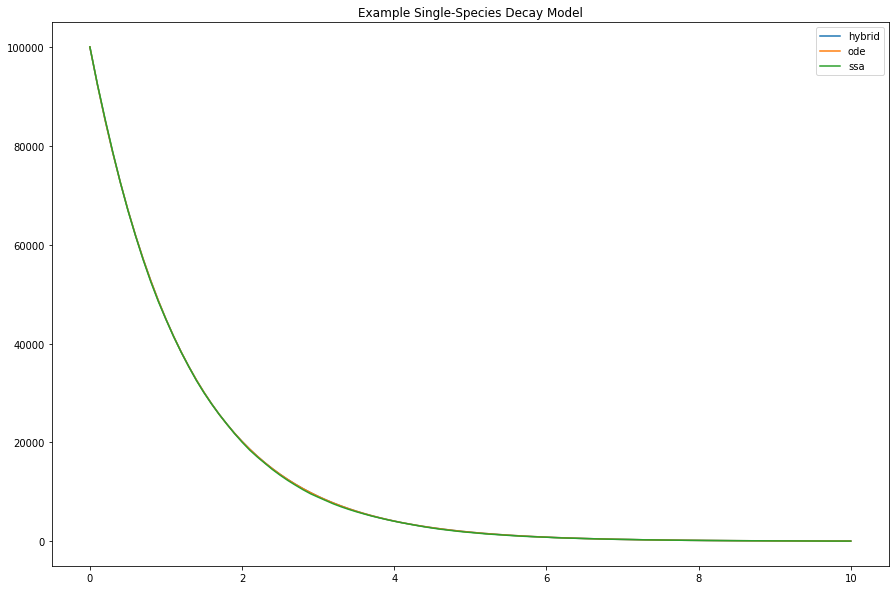

In [17]:
plt.figure(figsize=(15, 10))
start_slice = 9
end_slice = 11
for species in hybrid_results[0]:
    if species == 'time': continue
    plt.plot(hybrid_results[0]['time'], hybrid_results[0][species], label='hybrid')
for species in ode_results[0]:
    if species == 'time': continue
    plt.plot(ode_results[0]['time'], ode_results[0][species], label='ode')
for species in ssa_results[0]:
    if species == 'time': continue
    plt.plot(ssa_results[0]['time'], ssa_results[0][species], label='ssa')
plt.title('Example Single-Species Decay Model')
plt.legend(loc='best')

<BarContainer object of 3 artists>

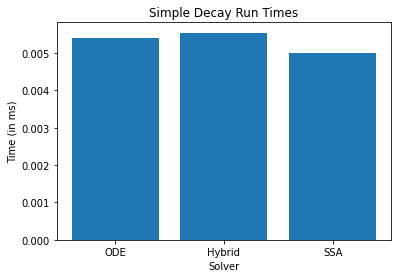

In [18]:
x = ['ODE', 'Hybrid', 'SSA']
runtimes = [ode_avg, hybrid_avg, ssa_avg]
plt.xlabel('Solver')
plt.ylabel('Time (in ms)')
plt.title('Simple Decay Run Times')
plt.bar(x, runtimes)